<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/coefficients_of_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='khaki'>Getting to understand Multiple Linear Regression better by walking through it's internal workings and computation.

[stattrek.com](https://stattrek.com/multiple-regression/regression-coefficients.aspx?Tutorial=reg)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Defining the scores table  like on the website

In [2]:
student_scores = pd.DataFrame({'Score':[100, 90, 80, 70, 60], 'IQ':[110, 120, 100, 90, 80,], 'Study_hours':[40, 30, 20, 0, 10]})

student_scores.index.name='Student'

student_scores.head()

,Score,IQ,Study_hours
Student,,,
0,100,110,40
1,90,120,30
2,80,100,20
3,70,90,0
4,60,80,10


## Defining Matrix $X$

In [3]:
X = student_scores.loc[:, ['IQ',"Study_hours"]]

ones = np.ones(len(student_scores), dtype=int)

X.insert(0, 'ones', ones)

X.head()

,ones,IQ,Study_hours
Student,,,
0,1,110,40
1,1,120,30
2,1,100,20
3,1,90,0
4,1,80,10


In [4]:
# Next we convert X to a Numpy array from a Data frame

X = X.values

X

array([[  1, 110,  40],
       [  1, 120,  30],
       [  1, 100,  20],
       [  1,  90,   0],
       [  1,  80,  10]])

## Defining $X'$ or X Transpose

In [5]:
X_tp = X.transpose()

X_tp

array([[  1,   1,   1,   1,   1],
       [110, 120, 100,  90,  80],
       [ 40,  30,  20,   0,  10]])

#### Print out the shape of X and X'.

In [6]:
print('X shape is',X.shape,'\nX-transpose shape is',X_tp.shape)

X shape is (5, 3) 
X-transpose shape is (3, 5)


## Post-multiply $X'$ by $X$... using matrix multiplication

In [7]:
X_tp_X = np.matmul(X_tp, X)

X_tp_X

array([[    5,   500,   100],
       [  500, 51000, 10800],
       [  100, 10800,  3000]])

Notice,  that so far we are getting exactly the same result as on the website [stattrek.com](https://stattrek.com/multiple-regression/regression-coefficients.aspx?Tutorial=reg)

## Next we define the inverse of $X'X$, just like in the website

In [8]:
from numpy.linalg import inv

inverse = inv(X_tp_X)

inverse

array([[ 2.02000000e+01, -2.33333333e-01,  1.66666667e-01],
       [-2.33333333e-01,  2.77777778e-03, -2.22222222e-03],
       [ 1.66666667e-01, -2.22222222e-03,  2.77777778e-03]])

In [9]:
# checking to make sure the same values as the website

print(inverse[0,:])
print(inverse[1,:])
print(inverse[2,:])

[20.2        -0.23333333  0.16666667]
[-0.23333333  0.00277778 -0.00222222]
[ 0.16666667 -0.00222222  0.00277778]


everything is perfect up to this point

In [10]:
X_tp.shape

(3, 5)

In [11]:
inverse.shape

(3, 3)

## Next we post-multiply $(X'X)^{-1}$ by $X'$ 

In [12]:
X_tp_inverse = np.matmul(inverse, X_tp)

X_tp_inverse

array([[ 1.20000000e+00, -2.80000000e+00,  2.00000000e-01,
        -8.00000000e-01,  3.20000000e+00],
       [-1.66666667e-02,  3.33333333e-02,  1.73472348e-17,
         1.66666667e-02, -3.33333333e-02],
       [ 3.33333333e-02, -1.66666667e-02, -1.73472348e-17,
        -3.33333333e-02,  1.66666667e-02]])

In [13]:
X_tp_inverse.shape

(3, 5)

## Next we define the $Y$ variable

In [14]:
Y = student_scores.Score.values

Y

array([100,  90,  80,  70,  60])

In [15]:
Y.shape

(5,)

## Calculating the slope or coefficients

<h2><font color='khaki'>$ b = (X'X)^{-1}X'Y $</h2>

## Finally we Post-multiply $(X'X)^{-1}X'$ by $Y$ to get the coefficients of the MLR model

In [16]:
coefficients = np.matmul(X_tp_inverse, Y)

coefficients

array([20. ,  0.5,  0.5])

## $y_{hat} = b0 + b1x1 + b2x2$

which now means

## $y_{hat} = 20 + 0.5x1 + 0.5x2$

which now means

## $y_{hat} = 20 + 0.5(IQ) + 0.5(Study-hours)$

# <font color='khaki'>Part Two

# Real World Data

### Let's extrapolate on our learnings and apply these concepts to real live data

Let's download the data set from Git-hub

In [0]:
# Let's import our Data set
data = "https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv"

# Next let's define additional usual representation of null values to help us select and deal with null data
missing_data = ['n/a','na','--','?']

In [18]:
fuel_df = pd.read_csv(data, na_values=missing_data)

fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


let's explore the data 

In [19]:
# let's check the data types per column or attribute are correct
fuel_df.dtypes

MODEL_YEAR                          int64
MAKE                               object
MODEL                              object
VEHICLE_CLASS                      object
ENGINE_SIZE(L)                    float64
CYLINDERS                           int64
TRANSMISSION                       object
FUEL_TYPE                          object
FUEL_CONSUMPTION_CITY(L/100km)    float64
HWY_(L/100km)                     float64
COMB_(L/100km)                    float64
COMB_(mpg)                          int64
CO2_EMISSIONS(g/km)                 int64
dtype: object

In [20]:
# Let's confirm the shape of the data type
fuel_df.shape

(14343, 13)

In [21]:
# Let's check for missing values
fuel_df.isna().any().all()

False

In [0]:
# Let's rename some column names for brevity
fuel_df.rename(columns={'FUEL_CONSUMPTION_CITY(L/100km)':'FUEL_CONS_CITY', 
                        'ENGINE_SIZE(L)':'ENGINE_SIZE',
                       'HWY_(L/100km)':'HWY_L100km',
                       'COMB_(L/100km)':'COMB_L100km',
                       'COMB_(mpg)':'COMB_MPG',
                       'CO2_EMISSIONS(g/km)':'CO2_EMISSIONS'},
                       inplace=True)

In [23]:
# Let's display the renamed data set
fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY,HWY_L100km,COMB_L100km,COMB_MPG,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


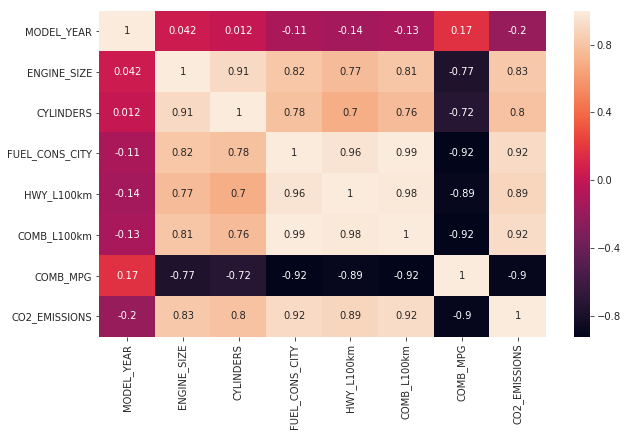

In [24]:
# Let's plot the correlation of the data set using a heatmap from seaborn library
corr_data = fuel_df.corr()

plt.figure(figsize=(10, 6))
sns.set_style('ticks')

sns.heatmap(corr_data, annot=True)

plt.show()

The Top correlated variables with CO2_EMISSIONS

In [25]:
corrs = {'Variable_Name':['Engine_Size','Cylinders','Fuel_Cons_City','Hwy_L/100','Comb_L/100','Comb_mpg'],
                'Corr_Amount':[round(fuel_df['ENGINE_SIZE'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['CYLINDERS'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['FUEL_CONS_CITY'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['HWY_L100km'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['COMB_L100km'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['COMB_MPG'].corr(fuel_df.CO2_EMISSIONS),2)],
               'Description':['Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Negative Correlation']}

# highest_corr = pd.DataFrame(highest_corr, index=[1,2,3,4,5,6])

# highest_corr

corrs

{'Corr_Amount': [0.83, 0.8, 0.92, 0.89, 0.92, -0.9],
 'Description': ['Strong Positive Correlation',
  'Strong Positive Correlation',
  'Strong Positive Correlation',
  'Strong Positive Correlation',
  'Strong Positive Correlation',
  'Strong Negative Correlation'],
 'Variable_Name': ['Engine_Size',
  'Cylinders',
  'Fuel_Cons_City',
  'Hwy_L/100',
  'Comb_L/100',
  'Comb_mpg']}

### To calculate multicolinearity using VIF

In [26]:
data = fuel_df[['ENGINE_SIZE','CYLINDERS','FUEL_CONS_CITY','COMB_MPG', 'HWY_L100km', 'COMB_L100km']]

data.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,HWY_L100km,COMB_L100km
0,1.6,4,9.2,35,6.7,8.1
1,1.6,4,8.5,37,6.5,7.6
2,3.2,6,12.2,28,7.4,10.0
3,3.5,6,13.4,25,9.2,11.5
4,1.8,4,10.0,33,7.0,8.6


In [0]:
def standardize(data_features):
    data_features = (data_features - data_features.mean()) / data_features.std()
    return data_features

In [28]:
std_data = data.apply(standardize, axis=0)
std_data.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,HWY_L100km,COMB_L100km
0,-1.429815,-1.119788,-1.046373,1.019024,-0.902562,-0.998244
1,-1.429815,-1.119788,-1.243575,1.285557,-0.987882,-1.166213
2,-0.209256,0.006162,-0.201224,0.086159,-0.603942,-0.359962
3,0.019599,0.006162,0.136836,-0.313640,0.163939,0.143945
4,-1.277245,-1.119788,-0.821000,0.752491,-0.774582,-0.830275


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns

vif

,VIF_Factor,features
0,6.947478,ENGINE_SIZE
1,6.338015,CYLINDERS
2,1818.224119,FUEL_CONS_CITY
3,6.832871,COMB_MPG
4,533.988354,HWY_L100km
5,4184.504559,COMB_L100km


In [0]:
std_data.drop(['COMB_L100km','HWY_L100km','FUEL_CONS_CITY'], axis=1, inplace=True)

In [31]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns

vif

,VIF_Factor,features
0,6.566240,ENGINE_SIZE
1,5.570778,CYLINDERS
2,2.474966,COMB_MPG


From The VIF analysis, our predictor variables with lowest VIF values are CYLINDERS and COMB_MPG.<br>
These shall be our features or independent variables, let's split the data to train and test

In [32]:
std_data.head()

,ENGINE_SIZE,CYLINDERS,COMB_MPG
0,-1.429815,-1.119788,1.019024
1,-1.429815,-1.119788,1.285557
2,-0.209256,0.006162,0.086159
3,0.019599,0.006162,-0.313640
4,-1.277245,-1.119788,0.752491


#### Let's first compile the data into training and testing data

next we define the training data by making it 75% of the data selected at random 

In [33]:
# Save the standardized data with moderate VIF values as X
X = data[['ENGINE_SIZE','CYLINDERS','COMB_MPG']]

# Define a column of ones, the length of X
ones = np.ones(len(X), dtype= 'int8')

# Insert The column of ones to the first position of X
X.insert(0, 'Ones', ones)

# Display first 5 rows of X
X.head()

,Ones,ENGINE_SIZE,CYLINDERS,COMB_MPG
0,1,1.6,4,35
1,1,1.6,4,37
2,1,3.2,6,28
3,1,3.5,6,25
4,1,1.8,4,33


In [34]:
y = fuel_df.CO2_EMISSIONS
y.head()

0    186
1    175
2    230
3    264
4    198
Name: CO2_EMISSIONS, dtype: int64

In [35]:
# Import train_test_split for splitting the data set
from sklearn.model_selection import train_test_split

# split the data set into training and testing sets.
X, X_test, y, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Display the shapes of each split
print('X shape is:',X.shape)
print('y shape is:',y.shape)
print('X_test shape is:',X_test.shape)
print('y_test shape is:',y_test.shape)

X shape is: (10757, 4)
y shape is: (10757,)
X_test shape is: (3586, 4)
y_test shape is: (3586,)


## The LSE formula for $b$ coefficients matrix is defned as:-

<h1>$b=(X^{'}X)^{-1}X^{'}Y$<h1>

## Model Development or Compiling-The-Model

next define $X'$ or $X$ transpose

In [36]:
# First we convert X and X_test y, y_test to Numpy arrays for ease of computing
X = X.values
X_test = X_test.values
y = y.values
y_test = y_test.values

# Next we define X_trans, the Transpose of X matrix
X_trans = X.transpose()

print('X-Trans shape:',X_trans.shape)
X_trans

X-Trans shape: (4, 10757)


array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [ 2.2,  3.5,  4.8, ...,  1.6,  2.7,  2.5],
       [ 4. ,  6. ,  8. , ...,  4. ,  4. ,  6. ],
       [34. , 27. , 19. , ..., 39. , 31. , 27. ]])

Next post-multiply $X'$ by $X$

In [37]:
# Post-multiply X_trans by X
X_trans_X = np.matmul(X_trans, X)

# Print out the shape of X_trans_X
print('X_Trans_X shape:',X_trans_X.shape)
X_trans_X

X_Trans_X shape: (4, 4)


array([[  10757.  ,   37355.6 ,   64373.  ,  294657.  ],
       [  37355.6 ,  148350.44,  246276.8 ,  941359.7 ],
       [  64373.  ,  246276.8 ,  418991.  , 1659658.  ],
       [ 294657.  ,  941359.7 , 1659658.  , 8681631.  ]])

Next we define the inverse of $X'X$ written as $(X'X)^{-1}$ using the linear algebra library(linalg) from numpy

In [38]:
# Import inv from numpy.linear algebra
from numpy.linalg import inv

# define X_trans_X_inv
X_trans_X_inv = inv(X_trans_X)

# Print the shape of X_trans_X_inv
print("Shape of X_trans_X_inv is",X_trans_X_inv.shape)
X_trans_X_inv

Shape of X_trans_X_inv is (4, 4)


array([[ 8.95954717e-03, -4.75067404e-04, -3.98784058e-04,
        -1.76342306e-04],
       [-4.75067404e-04,  3.54271378e-04, -1.93413869e-04,
         1.46845694e-05],
       [-3.98784058e-04, -1.93413869e-04,  1.67471752e-04,
         2.49154828e-06],
       [-1.76342306e-04,  1.46845694e-05,  2.49154828e-06,
         4.03172110e-06]])

Next we post-multiply  $(X'X)^{-1}$ by $X'$ 

In [39]:
# Let's Post-multiply X_trans_X_inv by X_trans
X_trans_X_inv_X_trans = np.matmul(X_trans_X_inv, X_trans)

# Let's print the shape
print("Shape of X_trans_X_inv_X_trans is",X_trans_X_inv_X_trans.shape)

Shape of X_trans_X_inv_X_trans is (4, 10757)


Next we post-multiply  $(X'X)^{-1}X'$ by $y$ 

In [40]:
# Matrix b or coefficients defined as:
b = np.matmul(X_trans_X_inv_X_trans, y)

# Let's print the shape of b
print('Shape of matrix b or coefficients is:', b.shape)

# Print the values of b
print(b)

Shape of matrix b or coefficients is: (4,)
[322.5539238    7.9148692    5.89255091  -5.00194268]


## Model Training or Fitting-The-Model

Finally we find our coefficients by post-multiplying $(X'X)^{-1}X'$ by $y-train$

### Thus our Multiple Linear Regression Model Ideal Parameters are:- 

In [41]:
intercept = b[0]

b1 = b[1]

b2 = b[2]

b3 = b[3]


print('Intercept or bias unit is:',intercept)
print('b1 or slope for ENGINE_SIZE variable is:',b1)
print('b2 or slope for CYLINDERS variable is:',b2)
print('b3 or slope for COMB_MPG variable is:',b3)

Intercept or bias unit is: 322.5539237961792
b1 or slope for ENGINE_SIZE variable is: 7.914869196847668
b2 or slope for CYLINDERS variable is: 5.892550907326874
b3 or slope for COMB_MPG variable is: -5.001942684553934


## Model Evaluation

#### Let's define a simple method for prediction

In [0]:
def predict(x):
    """ takes a row of test data and predicts it
    and returns the summed value of the observation"""
    x = list(x)
    
    x = x[0]*intercept + x[1]*b1 + x[2]*b2 + x[3]*b3
    
    return x

Next let's convert the test data to a Data frame so we can apply the predict method on it

In [43]:
X_eval = pd.DataFrame(X_test)

X_eval.head()

,0,1,2,3
0,1.0,5.9,8.0,17.0
1,1.0,2.5,4.0,26.0
2,1.0,4.6,8.0,25.0
3,1.0,5.5,8.0,22.0
4,1.0,4.7,8.0,20.0


Next let's apply the predict method and pass axis=1 so it's done along the columns<br>
Then we convert it to a numpy ID array using the .values and assign it all to y_hat.<br>
y_hat is then our model's prediction on the out-of-sample or test data set

In [44]:
y_hat = np.ceil(X_eval.apply(predict, axis=1).values)
y_hat

array([332., 236., 282., ..., 197., 246., 220.])

y_hat or our model prediction is now a numpy 1D array. This will be useful for plotting

In [45]:
type(y_hat)

numpy.ndarray

## Importing Metrics from Sklearn to evaluate the model

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

Let's compute the Mean Squared Error (y_true, y_pred)

In [47]:
MSE = mean_squared_error(y_test, y_hat)
MSE

516.9428332403793

Lets find the RMSE which is the square root of the MSE

In [48]:
RMSE = MSE**0.5

RMSE

22.736376871445003

**Finding the RMSE as a percentage of the range of the target variable.
The lower the percentage the better the model**

First we find the range of the target variable

In [49]:
y_range = y_test.max() - y_test.min()
y_range

430

Next we compute the RMSE as a percent of the range, the lower the error percent, the better the model

In [50]:
error_margin = (RMSE / y_range) * 100

error_margin

5.28752950498721

Finally let's compute the  R2  score or coefficient of determination of our model prediction.<br>
This tells us how confident the model is on each prediction<br>
The highest value is 1... So the closer to 1, the better the score

In [51]:
matrix_r2_score = r2_score(y_test, y_hat)  # pass in the true values first, then the predicted values.
matrix_r2_score

0.8529960960921926

## Visualization

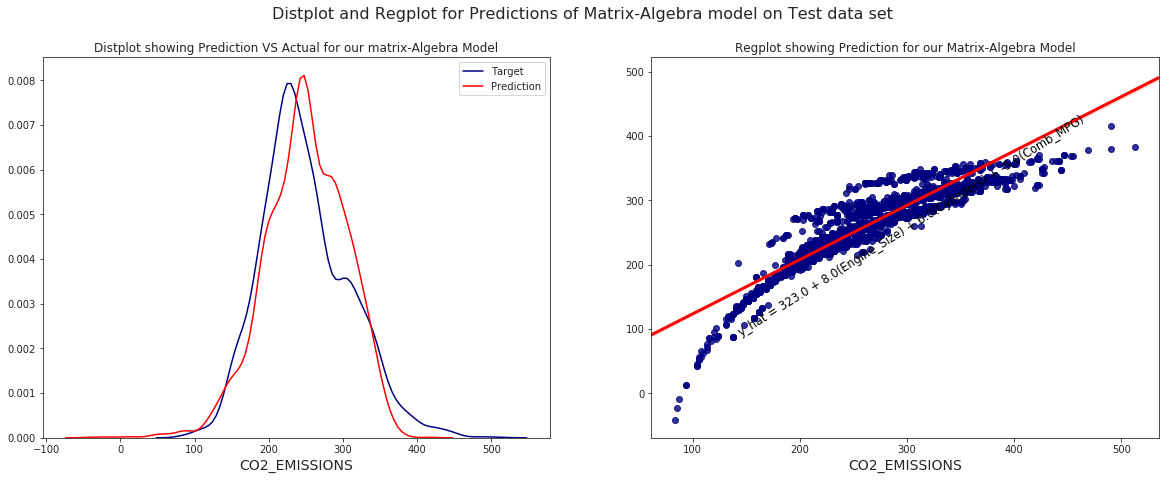

In [52]:
fig = plt.figure(figsize=(20, 7))
plt.suptitle('Distplot and Regplot for Predictions of Matrix-Algebra model on Test data set', fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plotting the Distplot
sns.distplot(y_test.squeeze(), hist=False, label='Target', color='navy', ax=ax)
sns.distplot(y_hat.squeeze(), hist=False, label='Prediction', color='red', ax=ax)
ax.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax.set_title('Distplot showing Prediction VS Actual for our matrix-Algebra Model')

# plotting the Regplot
sns.regplot(y_test.squeeze(), y_hat, scatter_kws={"color": "navy"}, line_kws={"color": "red" ,'linewidth':3}, ax=ax1)
ax1.annotate('y_hat = {} + {}(Engine_Size) + {}(Cylinders) + {}(Comb_MPG)'.format(np.round(intercept), 
                                                             np.round(b1), 
                                                             np.round(b2), 
                                                             np.round(b3)), 
                                                             xy=(140,420), 
                                                             rotation=32, 
                                                             fontsize=11.5, color='black')
ax1.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax1.set_title('Regplot showing Prediction for our Matrix-Algebra Model')



plt.show()

## Sklearn Model

Let's compare our model to a default model from SKlearn Library

In [0]:
# first import sklearn linear regression
from sklearn.linear_model import LinearRegression

# Instantiate a Linear regression model
model = LinearRegression()

Next train the model

In [54]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print the coefficients of the model parameters

In [56]:
# The Slope or gradient
model_slope = model.coef_

# the intercept or bias unit
model_intercept = model.intercept_

print('Slope =', model_slope,'\nIntercept = ',model_intercept)

Slope = [ 0.          7.9148692   5.89255091 -5.00194268] 
Intercept =  322.5539237961783


Let's predict the test data set using the sklearn model

In [0]:
y_pred = model.predict(X_test)

Let's evaluate performance of sklearn model

In [0]:
model_mse = mean_squared_error(y_test, y_pred)
model_mse

In [0]:
model_rmse = model_mse ** 0.5
model_rmse

In [0]:
model_error_margin = (model_rmse / y_range) * 100
model_error_margin

In [0]:
model_r2_score = r2_score(y_test, y_pred)
model_r2_score

In [0]:
summary_dict = {'algebra_model':[intercept, b1, b2, b3, MSE, RMSE, error_margin, matrix_r2_score],
               'sklearn_model':[model_intercept, model_slope[1], model_slope[2], model_slope[3], model_mse, model_rmse, model_error_margin, model_r2_score]}

summary_df = pd.DataFrame(summary_dict, index=['Intercept','b1','b2','b3','MSE','RMSE','Error_margin','R2_score'])
summary_df

Let's plot the sklearn modelpredictions

In [0]:
fig = plt.figure(figsize=(20, 7))
plt.suptitle('Distplot and Regplot for Predictions of Sklearn model on Test data set', fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plotting the Distplot
sns.distplot(y_test.squeeze(), hist=False, label='Target', color='green', ax=ax)
sns.distplot(y_hat.squeeze(), hist=False, label='Prediction', color='red', ax=ax)
ax.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax.set_title('Distplot showing Prediction VS Actual for our Sklearn Model')

# plotting the Regplot
sns.regplot(y_test.squeeze(), y_hat, scatter_kws={"color": "green"}, line_kws={"color": "red" ,'linewidth':3}, ax=ax1)
ax1.annotate('y_hat = {} + {}(Engine_Size) + {}(Cylinders) + {}(Comb_MPG)'.format(np.round(model_intercept), 
                                                             np.round(model_slope[0]), 
                                                             np.round(model_slope[1]), 
                                                             np.round(model_slope[2])), 
                                                             xy=(140,420), 
                                                             rotation=32, 
                                                             fontsize=11.5, color='black')
ax1.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax1.set_title('Regplot showing Prediction for our Sklearn Model')



plt.show()

## Summary

We have seen how multiple linear regression(MLR) works step by step using matrix algebra.
We built a MLR Model from scratch by first determining correlated variables, determining multicolinearity and selecting 3 moderately linear-independent variables.
Then we trained the model with the training data set using matrix multiplication in line with the least squares estimate formula and used the model to make predictions on the test data set that is not yet known to the model(out of sample data set).
Then we evaluated the model using MSE, RMSE and r2_score and compared it to a model from sklearn library.

Our Model performed quite good on the out-of-sample data set.<br>
With an error_margin of only 4.6% of the target variable range and a coefficient of determination of 0.85 out of 1.0